In [278]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [279]:
# read from csv file
csv_file = 'Outputs/scoap_scores_csv/gate_scores10.csv'

raw_scores = np.genfromtxt(csv_file, delimiter=',', skip_header=1, dtype=str)
print(raw_scores)

[['g0' '504' '5' '5' '77' '0']
 ['g1' '490' '3' '3' '61' '0']
 ['g10' '852' '48' '40' '3' '0']
 ...
 ['g97' '776' '7' '116' '692' '0']
 ['g98' '157' '3' '20' '102' '0']
 ['g99' '549' '13' '4' '669' '0']]


In [280]:
# Handle #INF or #N/A by converting to np.inf or np.nan
def safe_float(x):
    if x == "#INF":
        return np.inf
    elif x == "#N/A":
        return np.nan
    else:
        return float(x)

In [281]:
def to_float(x):
    return np.inf if x == "#INF" else float(x)

In [282]:
# Convert CC0, CC1, CO, is_trojan (columns 2,3,4,5) from string to float, handle #INF
cc0 = np.array([to_float(x) for x in raw_scores[:, 2]])
cc1 = np.array([to_float(x) for x in raw_scores[:, 3]])
co  = np.array([to_float(x) for x in raw_scores[:, 4]])
labels = raw_scores[:, 5].astype(int)

# Compute combined CC = sqrt(CC0² + CC1²)
combined_cc = np.sqrt(cc0 ** 2 + cc1 ** 2)

# Separate points based on Trojan label
cc_trojan     = combined_cc[labels == 1]
co_trojan     = co[labels == 1]
cc_normal     = combined_cc[labels == 0]
co_normal     = co[labels == 0]

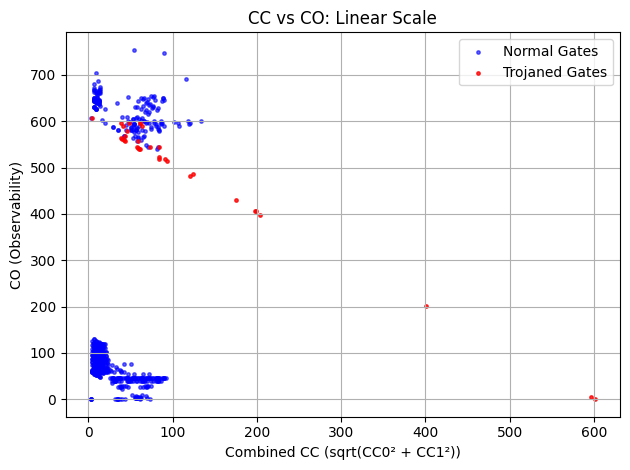

In [283]:
# Plot
plt.scatter(cc_normal, co_normal, color='blue', label='Normal Gates', alpha=0.6, s=6)
plt.scatter(cc_trojan, co_trojan, color='red', label='Trojaned Gates', alpha=0.8, s=6)
plt.xlabel("Combined CC (sqrt(CC0² + CC1²))")
plt.ylabel("CO (Observability)")
plt.title("CC vs CO: Linear Scale")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

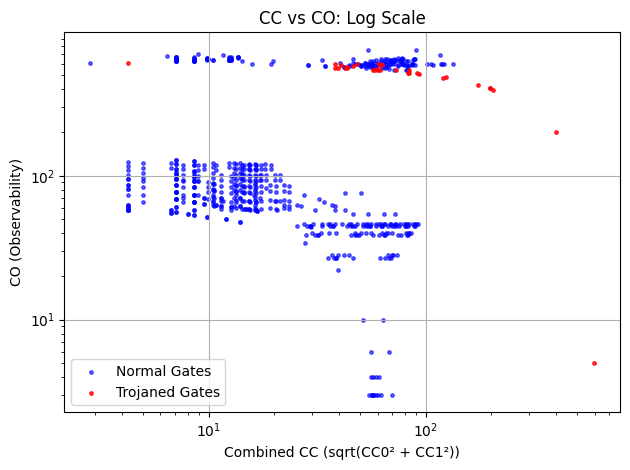

In [284]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.scatter(cc_normal, co_normal, color='blue', label='Normal Gates', alpha=0.6, s=6)
plt.scatter(cc_trojan, co_trojan, color='red', label='Trojaned Gates', alpha=0.8, s=6)
plt.xlabel("Combined CC (sqrt(CC0² + CC1²))")
plt.ylabel("CO (Observability)")
plt.title("CC vs CO: Log Scale")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [285]:
# run k-means algorithm
X = np.column_stack((combined_cc, co))

k_means = KMeans(n_clusters=3)
k_means.fit(X)

labels = k_means.labels_
centers = k_means.cluster_centers_

/var/folders/40/28f2v1v956708sh811pz6_l00000gn/T/ipykernel_24283/2144818525.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


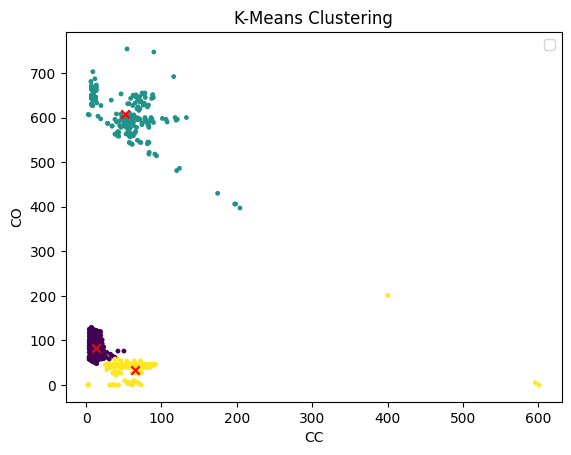

In [286]:
# k means clustering
# plt.scatter(final_array[:, 0], final_array[:, 1], c=labels, cmap='viridis', s=3)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=6)
# plt.scatter(cc_trojan, co_trojan, c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')  # cluster centers
plt.title('K-Means Clustering')
plt.xlabel('CC')
plt.ylabel('CO')
plt.legend()
plt.show()